### Kaggle Competition - Walmart Recruiting - Store Sales Forecasting

In [190]:
import warnings
warnings.filterwarnings('ignore')

#### Import necessary libraries

In [191]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


---

### 1. Dataset overview

#### 1.1 **'stores.csv'**

45 rows, 3 columns;  
45 Walmart stores located in different regions

Features:

- [Store] - the store numebr
- [Type] - the type of store
- [Size] - the size of the store

In [192]:
stores_df = pd.read_csv('stores.csv')

stores_df.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [193]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [194]:
stores_df.shape

(45, 3)

#### 1.2 **'features.csv'**

8190 rows, 12 columns;  
This file contains additional data related to the store, department, and regional activity for the given dates.

Features:

- [Store] - the store number
- [Date] - the week
- [Temperature] - average temperature in the region
- [Fuel_Price] - cost of fuel in the region
- [MarkDown1-5] - anonymized data related to promotional markdowns that Walmart is running. MarkDown data is only available after Nov 2011, and is not available for all stores all the time. Any missing value is marked with an NA.
- [CPI] - the consumer price index
- [Unemployment] - the unemployment rate
- [IsHoliday] - whether the week is a special holiday week

In [195]:
features_df = pd.read_csv('features.csv')

features_df.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [196]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [197]:
features_df.tail(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False
8189,45,2013-07-26,76.06,3.804,212.02,851.73,2.06,10.88,1864.57,NaN,NaN,False


In [198]:
features_df.shape

(8190, 12)

#### 1.3 **'train.csv'**

421570 rows, 5 columns;  
This is the historical training data, which covers to 2010-02-05 to 2012-11-01

Features:

- [Store] - the store number
- [Dept] - the department number
- [Date] - the week
- [Weekly_Sales] -  sales for the given department in the given store
- [IsHoliday] - whether the week is a special holiday week

In [199]:
train_df = pd.read_csv('train.csv')

train_df.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [200]:
train_df.shape

(421570, 5)

#### 1.4 **'test.csv'**

115064 rows, 4 columns;  
This file is identical to train.csv, except we have withheld the weekly sales. 

Features:

- [Store] - the store number
- [Dept] - the department number
- [Date] - the week
- [IsHoliday] - whether the week is a special holiday week

In [201]:
test_df = pd.read_csv('test.csv')

test_df.head(5)

,Store,Dept,Date,IsHoliday
0,1,1,2012/11/2,False
1,1,1,2012/11/9,False
2,1,1,2012/11/16,False
3,1,1,2012/11/23,True
4,1,1,2012/11/30,False


In [202]:
test_df.shape

(115064, 4)

---

### 2. Explore Datasets

#### 2.1 **'Explore stores_df'**

In [203]:
stores_df.head(2)

,Store,Type,Size
0,1,A,151315
1,2,A,202307


In [204]:
# no missing value
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [205]:
stores_df['Type'].value_counts(dropna = False)

Type
A    22
B    17
C     6
Name: count, dtype: int64

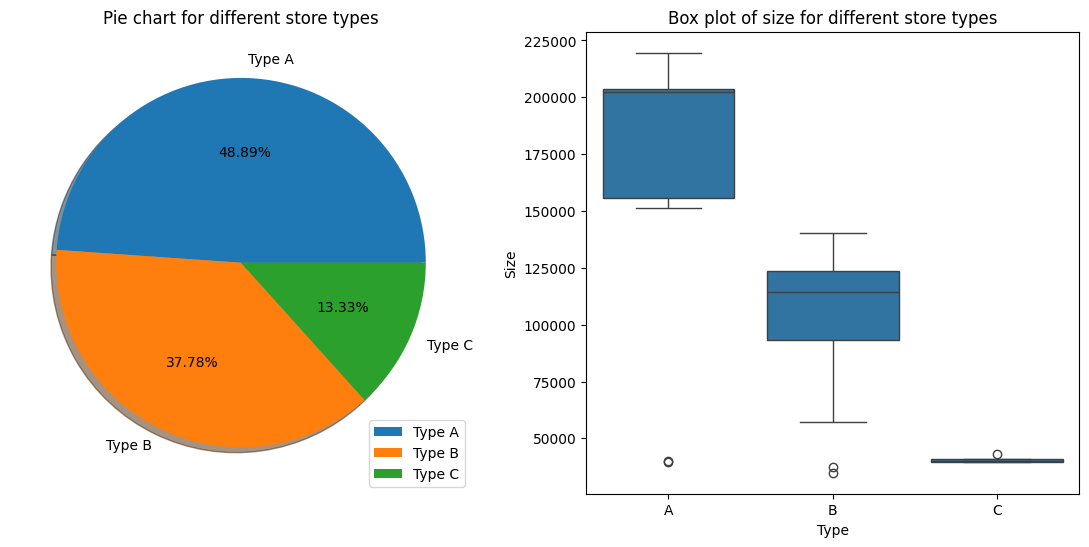

In [206]:
# visualization

type_groups = stores_df.groupby('Type').size()
sizes = [type_groups['A'], type_groups['B'], type_groups['C']]
labels = ['Type A', 'Type B', 'Type C']

# create canvas
fig = plt.figure(figsize = (14, 6))

# ============================================
# pie chart for stores with different 'type'

ax_type = fig.add_subplot(121)

ax_type.pie(x = sizes, labels = labels, shadow = True, autopct = '%.2f%%')

ax_type.set_title('Pie chart for different store types')

ax_type.legend(labels, loc = 'lower right')

# ============================================
# box chart for the size of store

ax_size = fig.add_subplot(122)

sns.boxplot(data = stores_df, x = 'Type', y = 'Size', ax = ax_size)

ax_size.set_title('Box plot of size for different store types')


plt.show()

#####################  
  Observation on stores  
#####################

1. About half of the stores are Type A
2. Type A basically has the biggest size, and Type C has the smallest one
3. There are only a few exceptions (outliers) in observation 2

#### 2.2 **Merge Datasets**

##### 2.2.1 **Merge Train Datasets**

In [207]:
# left join 'train' using Store in 'stores'
raw_train = pd.merge(train_df, stores_df, 
                    how = 'left', 
                    left_on = 'Store', right_on = 'Store')

raw_train.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315


In [208]:
# left join 'raw_train' using Store & Date in 'features'
train_df = pd.merge(raw_train, features_df, 
                    how = 'left', 
                    left_on = ['Store', 'Date'], right_on = ['Store', 'Date'])

train_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True


In [209]:
# delete redundant 'IsHoliday_y'
train_df.drop(['IsHoliday_y'], axis = 1, inplace = True)

# rename 'IsHoliday_x' to 'IsHoliday'
train_df.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True)

train_df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,A,151315,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106


In [210]:
train_df.shape

(421570, 16)

##### 2.2.2 **Merge Test Datasets**

In [211]:
# left join 'test' using Store in 'stores'
raw_test = pd.merge(test_df, stores_df, 
                    how = 'left', 
                    left_on = 'Store', right_on = 'Store')

# left join 'raw_train' using Store & Date in 'features'
test_df = pd.merge(raw_test, features_df, 
                    how = 'left', 
                    left_on = ['Store', 'Date'], right_on = ['Store', 'Date'])

# delete redundant 'IsHoliday_y'
test_df.drop(['IsHoliday_y'], axis = 1, inplace = True)

# rename 'IsHoliday_x' to 'IsHoliday'
test_df.rename(columns = {'IsHoliday_x': 'IsHoliday'}, inplace = True)

test_df.head(2)

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012/11/2,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2012/11/9,False,A,151315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [212]:
test_df.shape

(115064, 15)

#### 2.3 **'Explore train_df'**

In [213]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Type          421570 non-null  object 
 6   Size          421570 non-null  int64  
 7   Temperature   421570 non-null  float64
 8   Fuel_Price    421570 non-null  float64
 9   MarkDown1     150681 non-null  float64
 10  MarkDown2     111248 non-null  float64
 11  MarkDown3     137091 non-null  float64
 12  MarkDown4     134967 non-null  float64
 13  MarkDown5     151432 non-null  float64
 14  CPI           421570 non-null  float64
 15  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 48.6+ MB


In [214]:
train_df.isna().sum().sort_values(ascending = False)

MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Type                 0
Size                 0
Temperature          0
Fuel_Price           0
CPI                  0
Unemployment         0
dtype: int64